In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_excel('data.xlsx')
df

,Proses ID,Proses Tipi,Proses Addımı,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),İstifadə Edilən Katalizatorlar,Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Emal Məhsulları,Əməliyyat Xərcləri (AZN),İstifadə Edilən Avadanlıq,İşçi Sayı,Prosesin Başlama Tarixi,Prosesin Bitmə Tarixi,Təchizatçı Adı,Proses Qrupları
0,1,Neft Emalı,Distillə,1000,350,5,12,Kükürdizolyan katalizator,95,2000,500,2,"Nafta, LPG, Benzin",50000,"Distillə Kolonu, Pompa",15,2025-01-01,2025-01-02,AB Katalizatorları,Neft Emalı
1,2,Qaz Emalı,Kondensasiya,800,100,50,6,Aktiv karbon,92,1500,300,1,"LNG, CNG, Metan",45000,"Reaktor, Kompressor",10,2025-01-03,2025-01-04,XYZ Kompaniyası,Qaz Emalı
2,3,Kimya Emalı,Polimerizasiya,1200,220,8,10,Zirkonium katalizatoru,98,1800,400,0,"Polietilen, Polipropilen",60000,"Reaktor, Quruq Nəqliyyat Sistemi",20,2025-01-05,2025-01-06,UV Polimer Katalizatoru,Kimya Emalı
3,4,Neft Emalı,Katalitik Kraker,1500,500,20,15,Platinum katalizatoru,93,2500,600,3,"Benzin, Parafin, LPG",70000,"Kraker, Katalizator Kolonu",25,2025-01-07,2025-01-08,MK İnşaat,Neft Emalı
4,5,Qaz Emalı,Nəzarət Krakeri,900,150,45,8,Silika-alüminium katalizator,90,1300,350,0,"Butan, Propan",40000,"Kraker, Kompressor, Qazan",12,2025-01-09,2025-01-10,KLM Enerji,Qaz Emalı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Kimya Emalı,Sintetik Yanacaq,1050,210,12,16,Yüksək temperatur katalizator,84,2100,540,1,"Sintetik yanacaq, Nafta",64000,"Reaktor, Katalizator Qutusu",17,2025-03-22,2025-03-23,QRS Kimya,Kimya Emalı
996,997,Neft Emalı,Distillə,950,340,6,11,Kükürdizolyan katalizator,98,2050,470,1,"Nafta, Benzin",51000,"Distillə Kolonu, Pompa",14,2025-03-24,2025-03-25,AB Katalizatorları,Neft Emalı
997,998,Qaz Emalı,Kondensasiya,1000,115,50,6,Aktiv karbon,93,1550,320,1,"LNG, CNG, Metan",47000,"Reaktor, Kompressor",10,2025-03-26,2025-03-27,XYZ Kompaniyası,Qaz Emalı
998,999,Kimya Emalı,Polimerizasiya,1400,230,6,14,Zirkonium katalizatoru,99,1900,430,0,"Polietilen, Polipropilen",63000,"Reaktor, Quruq Nəqliyyat Sistemi",21,2025-03-28,2025-03-29,UV Polimer Katalizatoru,Kimya Emalı


In [4]:
df.describe()

,Proses ID,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Əməliyyat Xərcləri (AZN),İşçi Sayı,Prosesin Başlama Tarixi,Prosesin Bitmə Tarixi
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
mean,500.500000,1135.00000,272.250000,22.300000,13.382000,93.550000,1935.000000,451.000000,1.190000,57347.000000,17.500000,2025-02-12 15:41:45.600000256,2025-02-13 07:40:48
min,1.000000,800.00000,100.000000,5.000000,5.000000,84.000000,1250.000000,300.000000,0.000000,-71000.000000,9.000000,2022-01-13 00:00:00,2021-01-14 00:00:00
25%,250.750000,950.00000,147.500000,7.000000,8.750000,91.750000,1587.500000,345.000000,0.000000,47000.000000,12.750000,2025-01-31 00:00:00,2025-02-01 00:00:00
50%,500.500000,1075.00000,227.500000,15.000000,12.000000,94.000000,1950.000000,450.000000,1.000000,56000.000000,17.000000,2025-02-14 00:00:00,2025-02-15 00:00:00
75%,750.250000,1325.00000,342.500000,45.500000,14.250000,97.000000,2162.500000,542.500000,2.000000,64000.000000,21.250000,2025-02-27 00:00:00,2025-02-28 00:00:00
max,1000.000000,1600.00000,520.000000,52.000000,1800.000000,99.000000,2600.000000,630.000000,44.000000,710000.000000,28.000000,2025-03-30 00:00:00,2025-03-31 00:00:00
std,288.819436,232.54909,139.312941,18.000945,56.674598,4.143026,392.018722,107.891801,1.776811,23359.714623,5.786491,NaN,NaN


In [12]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr().style.background_gradient(cmap='coolwarm')





,Proses ID,Emal Həcmi (ton),Temperatur (°C),Təzyiq (bar),Prosesin Müddəti (saat),Emalın Səmərəliliyi (%),Enerji İstifadəsi (kWh),Ətraf Mühitə Təsir (g CO2 ekvivalent),Təhlükəsizlik Hadisələri,Əməliyyat Xərcləri (AZN),İşçi Sayı
Proses ID,1.000000,0.004099,0.001639,-0.000231,-0.053748,0.000523,0.001879,0.001703,-0.027884,-0.031996,0.002875
Emal Həcmi (ton),0.004099,1.000000,0.784304,-0.478369,0.039428,0.302080,0.797717,0.752642,0.407842,0.430112,0.961469
Temperatur (°C),0.001639,0.784304,1.000000,-0.532351,0.036495,0.220712,0.908586,0.907734,0.562802,0.369717,0.831184
Təzyiq (bar),-0.000231,-0.478369,-0.532351,1.000000,-0.070448,-0.389443,-0.655068,-0.620190,-0.100368,-0.264583,-0.580445
Prosesin Müddəti (saat),-0.053748,0.039428,0.036495,-0.070448,1.000000,-0.071476,0.076423,0.087306,0.018364,0.035134,0.052473
Emalın Səmərəliliyi (%),0.000523,0.302080,0.220712,-0.389443,-0.071476,1.000000,0.128350,-0.060575,-0.030528,0.040919,0.234868
Enerji İstifadəsi (kWh),0.001879,0.797717,0.908586,-0.655068,0.076423,0.128350,1.000000,0.955310,0.530074,0.422325,0.837325
Ətraf Mühitə Təsir (g CO2 ekvivalent),0.001703,0.752642,0.907734,-0.620190,0.087306,-0.060575,0.955310,1.000000,0.530046,0.404787,0.822523
Təhlükəsizlik Hadisələri,-0.027884,0.407842,0.562802,-0.100368,0.018364,-0.030528,0.530074,0.530046,1.000000,0.191757,0.403555
Əməliyyat Xərcləri (AZN),-0.031996,0.430112,0.369717,-0.264583,0.035134,0.040919,0.422325,0.404787,0.191757,1.000000,0.440969


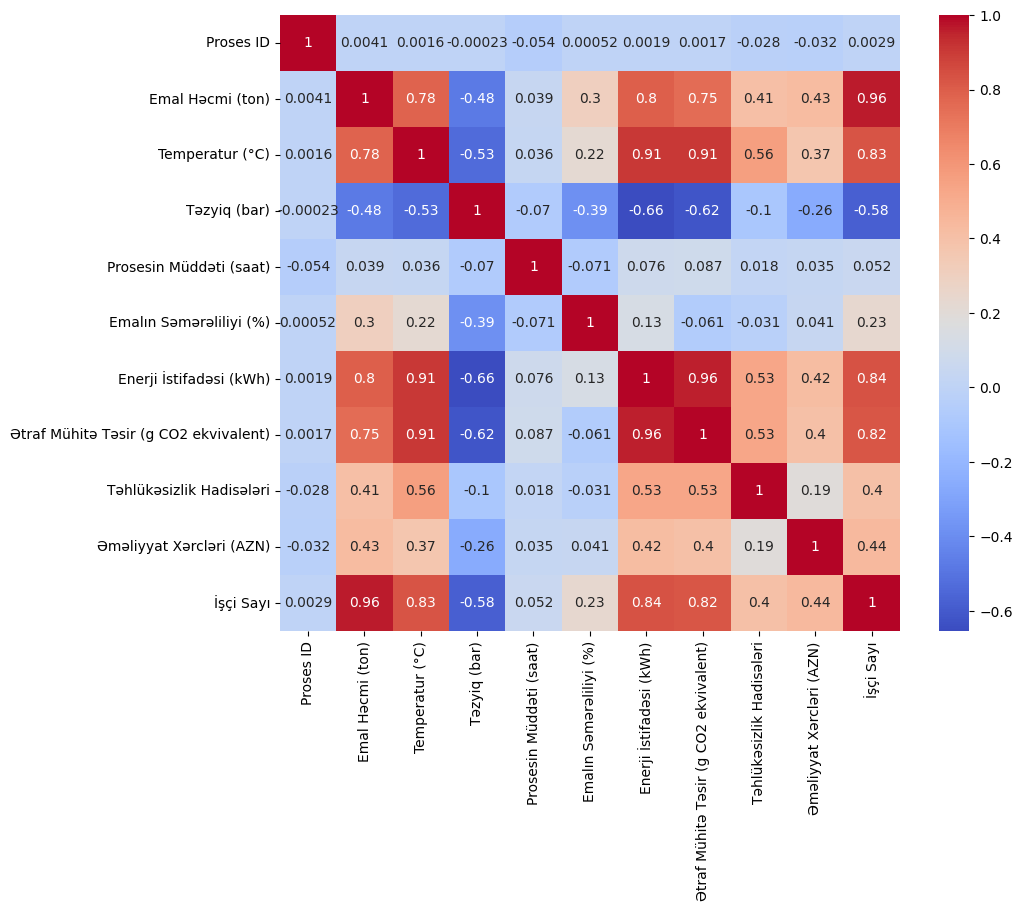

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()
